# Project: Investigate a Dataset - Patient No-Shows for Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The medical appointment dataset contains information on over 100k appointments from the country of Brazil. The dataset was originally sourced from <a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle.</a> It was created to study what factors were useful in predicting if patients would miss their appointments. It contains basic demographic information on the patients as well as whether or not the patient received SMS notifications. In addition, it indicates if the patient received financial aid.

>### Questions to Investigate
><ul>
><li>What is the overall appointment show-up vs. no-show rate?</li>
><li>Does financial  aid correlate with patient no-shows?</li>
><li>Is age indicative of whether a patient will make their appointments?</li>
><li>Do no-shows have a larger timeframe between schedule date and appointment date?</li>
><li>Do some days of the week have more no-shows than others?</li>
><li>Do SMS notifications coincide with fewer no-shows?</li>
><li>Which neighborhoods have more no-shows than others?</li>
></ul>


## The Investigation

>### Methodology
>The general methodology followed to perform the investigation:
><ul>
><li>Data Wrangling. Moving raw data into dataframes for manipulation.</li>
><li>Data Cleaning. Transforming data to uniform format.</li>
><li>Data Analysis. Exploring data and patterns.</li>
><li>Data Visualization. Visualizing and drawing conclusions.</li>
></ul>

<a id='wrangling'></a>
## Data Wrangling

><strong>Step 1: Import data analysis packages.</strong> 
><p>This investigation makes uses of the following data analytics packages:
><ul>
><li>Pandas. Provides flexible data structures designed to make working with “relational” or “labeled” data intuitive.</li>
><li>Numpy.  For adding support for large arrays, along with high-level mathematical functions to manipulate these arrays with speed.</li>
><li>Matplotlib. For creating plots and visualizations with just a few lines of code.</li>
><li>Datetime. For manipulating dates and times.<l/i>
><li>Scipy. For scientific computing and technical computing.</li>
><li>Seaborn. To provide better control of output and plots.</li>
></ul></p>


In [50]:
# Import modules for working with data
import pandas as pd
import numpy as np
import datetime as dt
import scipy

# Imports for better control of output and plots
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(font_scale=1.5)

# Show plots in the notebook
%matplotlib inline


><strong>Step 2: Load the data into the Jupyter notebook.</strong>

In [51]:
# load the data file into a dataframe
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

><strong>Step 3: Integrity check to see if there is any naming or data type anomalies.</strong>

In [52]:
# Check data integrity for the first few rows
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


><strong>Observations / Changes Needed:</strong>
><ul>
><li>Changing column case and using underscores will make columns easier to read and manipulate.</li>
><li>Changing column misspellings will make columns easier to read and manipulate.</li>
><li>No-show column value is ‘No’ if the patient showed up to their appointment, and ‘Yes’ if the patient did not show up.</li>
><li>Scholarship column value of 1 indicates a patient is provided financial aid by the government. <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Source and further information.</a> </li>
</ul>

><strong>Step 4: Data Integrity check for NULLS, and duplicates.</strong>

In [53]:
# Check data scructure of DataFrame
df.info()

# Check if there is any duplicates in the data 
print("Number of dublicated entries: ", + sum(df.duplicated()))

# Count the number of unique patient and appointment IDs
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Number of dublicated entries:  0


PatientId         62299
AppointmentID    110527
dtype: int64

><strong>Observations / Changes Needed:</strong>
><ul>
><li>Changing patientID data type from float to int will make the dataset easier to manipulate.</li>
><li>Stripping time from the schedule_day column will make the dataset easier to manipulate. </li>
><li>Stripping time from the appointment_day column will make the dataset easier to manipulate.  </li>
><li>No duplicate data exists.  It appears some patients had multiple visits.</li>

</ul>

><strong>Step 5:  Integrity check to see a  summary of statistics to look for anomalies.</strong>

In [54]:
# Compute a summary of statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [55]:
# Check if there is an age less than 0 value
df[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [56]:
# Check if there is an age greater than 100 value
df[df["Age"] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


><strong>This output exposed outliers in the age field that could potentially be errors. </strong><p>The youngest person is -1 and the oldest is 115. Boxplots provide a way to visually identify outliers. Boxplots graphically display the interquartile ranges of the data, with outliers located outside of the whiskers of the plot. </p>

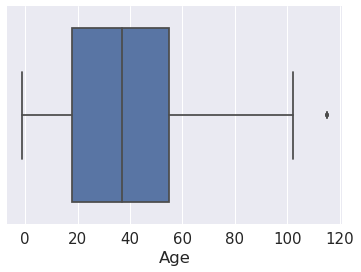

In [57]:
# Create a boxplot of the age using seaborn
sns.boxplot(df.Age)

><strong>Observations / Changes Needed:</strong>
><ul>
><li>There are two patients in the data that were allegedly 115 years old. Given that <a href="https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people">"Super centurians"</a> are very rare it is unlikely that this information is accurate. These entries along with the -1 patient will be removed to ensure no outlier affects occur.  </li>
<!-- ><li>  </li> -->
</ul>

### Data Cleaning

><strong>Step 1: Fixed column mispellings, change column names, and transform no_show column data type to integer.</strong>
><p>Making the data as easy as possible to work with by eliminating confusing inconsistencies.</p>

In [58]:
# Changing the column names
new_col_names = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_col_names

# Converting no_show field from string to int to enable plotting in charts
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)

df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,0


><strong>Step 2: Change schedule_day and appointment_day columns to datetime. </strong>
><p> Converting date field from string to datetime to easily perform time calculations. </p>

In [59]:
# Convert date columns data type to datetime
df.appointment_day = df.appointment_day.apply(np.datetime64)
df.schedule_day   = df.schedule_day.apply(np.datetime64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null float64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


><strong>Step 3:   Trim time from schedule_day and appointment_day since neither have time-level data.  </strong>
><p> Removing the time portion of schedule_day and appointment_day. </p>

In [60]:
# Trim time from schedule_day and appointment_day columns
df['schedule_day'] = df['schedule_day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df['appointment_day'] = df['appointment_day'].apply(lambda x: x.strftime('%m-%d-%Y')) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null float64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


><strong>Step 4:   Created a appointment_dow column for day of week analysis.  </strong>
><p>Converting date fields from string to datetime, once again, to enable datetime functions, then converting date to day of week for report readability.  </p>

In [61]:
# Convert schedule_day and appointment_day back to datetime
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

# Convert schedule_day and appointment_day to day of week
df['schedule_dow'] = df['schedule_day'].dt.weekday_name
df['appointment_dow'] = df['appointment_day'].dt.weekday_name
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


><strong>Step 5:  Changed patiendID data type from float to int.  </strong>
><p>Converting patientID from float to int and remove scientific notation.  It is an unnecessary format for representing a patient ID.  </p>

In [62]:
# Convert patientID from float to int
df['patientID'] = df['patientID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
patientID          110527 non-null int64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
schedule_dow       110527 non-null object
appointment_dow    110527 non-null object
dtypes: datetime64[ns](2), int64(10), object(4)
memory usage: 13.5+ MB


><strong>Step 6:  Remove age outliers to ensure no outlier affects occur.  </strong>
><p>Output a boxplot to confirm the outliers are no longer present.
</p>

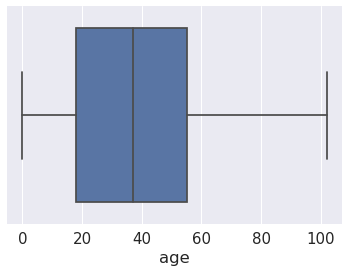

In [63]:
# Remove the outliers
df = df[(df.age > -1) & (df.age < 115)]

# Display the boxplot again to verify the outcome
sns.boxplot(df.age)

In [64]:
# Double check the data was removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
patientID          110521 non-null int64
appointmentID      110521 non-null int64
gender             110521 non-null object
schedule_day       110521 non-null datetime64[ns]
appointment_day    110521 non-null datetime64[ns]
age                110521 non-null int64
neighborhood       110521 non-null object
scholarship        110521 non-null int64
hypertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handicap           110521 non-null int64
sms_received       110521 non-null int64
no_show            110521 non-null int64
schedule_dow       110521 non-null object
appointment_dow    110521 non-null object
dtypes: datetime64[ns](2), int64(10), object(4)
memory usage: 14.3+ MB


><strong>Step 7:  Create DataFrames for reuse throughout analyses.  </strong>
><p>Create a derived column of time between schedule and appointment dates, create a reusable dataframe of all shows and no-shows records, and create a dataframe with ready-to-plot data types.
</p>

In [65]:
# Create a derived column of time between schedule and appointment dates
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['elapsed_days'] = df['appointment_day'] - df['schedule_day']
df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,elapsed_days
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday,Tuesday,35 days
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday,Tuesday,35 days
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,Wednesday,Tuesday,41 days
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,Wednesday,Tuesday,41 days
110526,377511518121127,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0,Wednesday,Tuesday,41 days


In [66]:
# Create a reusable dataframe of all shows records
shows = df.query('no_show == "0"')
days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')
shows.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,elapsed_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days


In [67]:
# Create a reusable dataframe of all no-shows records
no_shows = df.query('no_show == "1"')
days = no_shows['elapsed_days'].mean()
timeframe_nos = days / np.timedelta64(1, 'D')
no_shows.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,elapsed_days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,Friday,3 days
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,Friday,1 days
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,Friday,2 days


In [68]:
# create new seperate columns for people who showed ot not_showed
showed = df['no_show'] == 0
not_showed = df['no_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,elapsed_days,showed,not_showed
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days,True,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days,True,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days,True,False
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days,True,False
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days,True,False


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1:  What is the overall appointment show-up vs. no-show rate?

In [69]:
# Create a new DataFrame to show total appointments
new_df = df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "Show"
new_df.iloc[1,0] = "No Show"
new_df.head()

,appt_status,total
0,Show,88205
1,No Show,22316


In [70]:
# Create a new DataFrame to show total appointments and their propotions
shows_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
nos_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
new_df['proportion'] = [shows_prop, nos_prop]
new_df.head()

,appt_status,total,proportion
0,Show,88205,0.798084
1,No Show,22316,0.201916


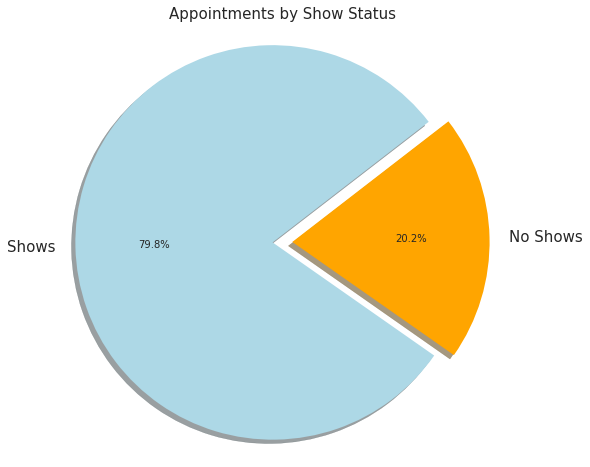

In [71]:
# Create a chart to show status
labels = ['No Shows', 'Shows']
sizes = [nos_prop, shows_prop]
colors = ['orange', 'lightblue']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=325)
plt.title('Appointments by Show Status', fontsize = 15)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8);

><strong>Visual distribution of appointment show status</strong>

### Research Question 2:  Does financial aid correlate with patient no-shows?

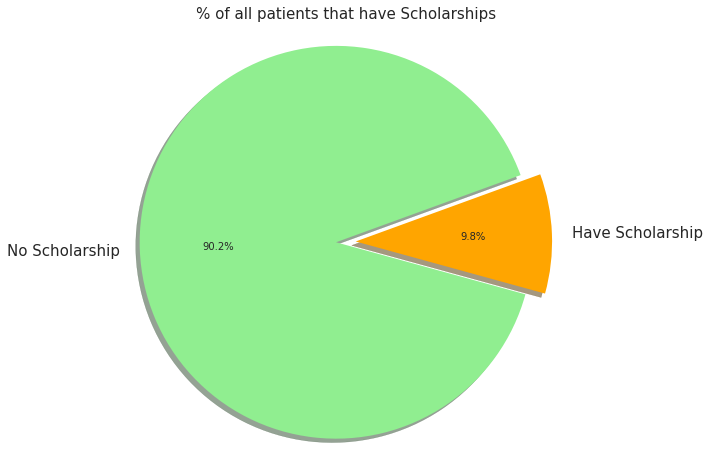

In [72]:
# Create a chart for % of patients taht have financial aid
allS = df['scholarship'].value_counts()# Data to plot
labels = ['No Scholarship', 'Have Scholarship']
colors = ['lightgreen', 'orange']
explode = (0, 0.1)

# The plot
plt.pie(allS, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=20)
plt.title('% of all patients that have Scholarships', fontsize = 15)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8);

><strong>Visual distribution for patients that have a Scholarship.</strong>

scholarship
0    0.801947
1    0.762637
Name: showed, dtype: float64
scholarship
0    99660
1    10861
Name: showed, dtype: int64


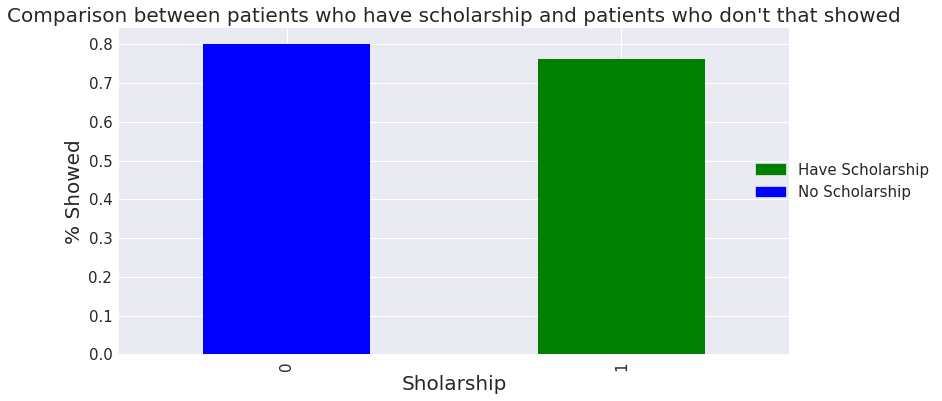

In [73]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't
print(df.groupby('scholarship')['showed'].mean())
print(df.groupby('scholarship')['showed'].count())

df.groupby('scholarship')['showed'].mean().plot(kind = 'bar', figsize=(12,6), color=['blue', 'green'])
plt.xlabel("Sholarship", fontsize = 20)
plt.ylabel("% Showed", fontsize = 20)
plt.title("Comparison between patients who have scholarship and patients who don't that showed", fontsize = 20)

# legend
green_patch = mpatches.Patch(color='green', label='Have Scholarship')
blue_patch = mpatches.Patch(color='blue', label='No Scholarship')

plt.legend(handles=[green_patch, blue_patch], bbox_to_anchor=(1.08, .53), loc='center')

><strong>Visual comparison between patients that have financial aid and those that have none that showed.</strong>

scholarship
0    0.198053
1    0.237363
Name: not_showed, dtype: float64


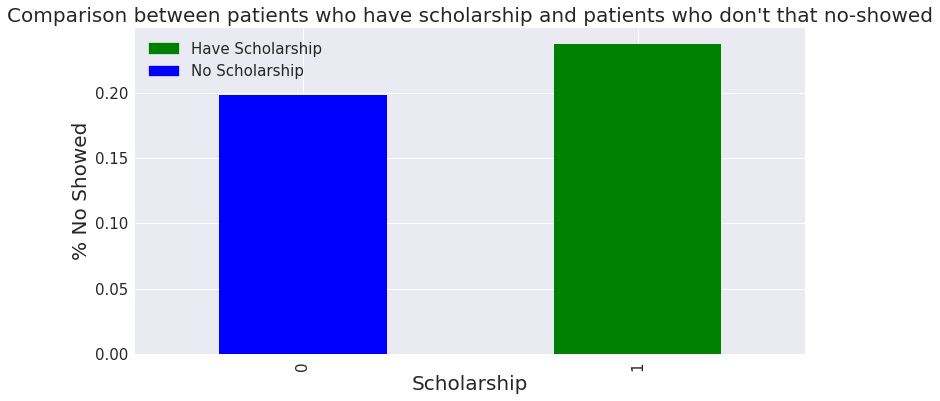

In [74]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't

print(df.groupby('scholarship')['not_showed'].mean())

df.groupby('scholarship')['not_showed'].mean().plot(kind = 'bar',figsize=(12,6), color=['blue', 'green'])
plt.xlabel("Scholarship", fontsize = 20)
plt.ylabel("% No Showed", fontsize = 20)
plt.title("Comparison between patients who have scholarship and patients who don't that no-showed", fontsize = 20)

# legend
green_patch = mpatches.Patch(color='green', label='Have Scholarship')
blue_patch = mpatches.Patch(color='blue', label='No Scholarship')

plt.legend(handles=[green_patch, blue_patch])

><strong>Visual comparison between patients that have financial aid and those that have none that no-show.</strong>

### Research Question 3:  Is age indicative of whether a patient will make their appointments?

In [75]:
# Define a function to show probability with respect to age
def prob_show(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['no_show']).reset_index()
    # calc probability of showing up 0 means show up , 1 means missed
    df['probShowUp'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowUp']]

In [76]:
# Data to plot
age_df_nos = no_shows['age']
age_df_shows = shows['age']

In [77]:
# Mean age of no-shows
age_df_nos_mean = no_shows['age'].mean()


# Mean age of shows
age_df_shows_mean = shows['age'].mean()


print("Mean age of no-shows: ", age_df_nos_mean)
print("Mean age of shows: ", age_df_shows_mean)

Mean age of no-shows:  34.3068202187
Mean age of shows:  37.788753472


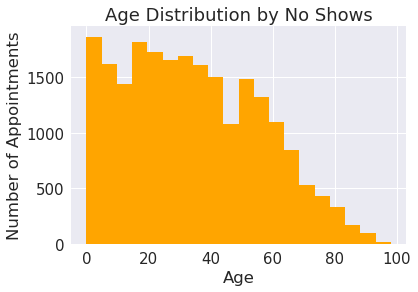

In [78]:
# The histogram of no-shows
plt.hist(age_df_nos, stacked=True, bins=20, color='orange')
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

><strong>Visual distribution of age for all no-shows.</strong>

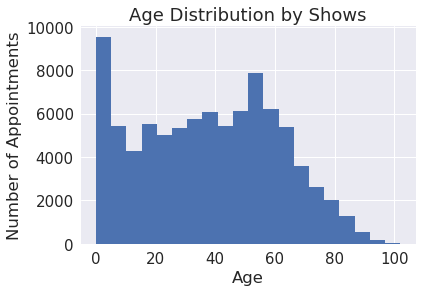

In [79]:
# The histogram of shows
plt.hist(age_df_shows, stacked=True, bins=20)
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

><strong>Visual distribution of age for all shows.</strong>

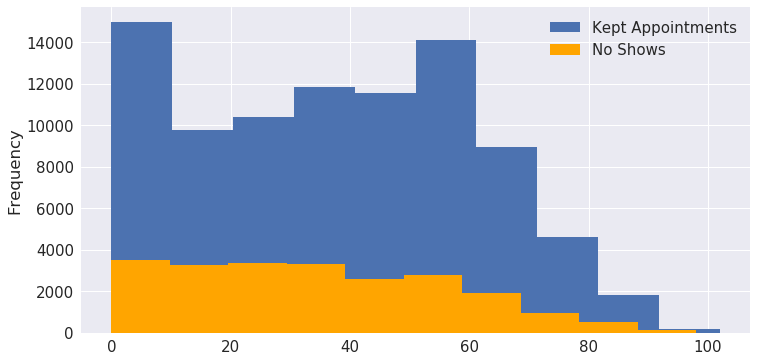

In [80]:
# Create an overlay histogram for shows and no-shows
kept = (df.no_show == 0)
noshows = (df.no_show == 1)

df[kept].age.plot.hist()
df[noshows].age.plot.hist(figsize=(12,6), color='orange')
plt.legend(['Kept Appointments', 'No Shows'])

><strong>Visual distribution of kept appointments vs no-shows</strong>
><p>This histogram overlays the distributions of kept appointments and no shows so that they can be compared. The peak near 60 >years is much smaller for no shows.</p>

Text(0.5,1,'Probability of showing up with respect to Age')

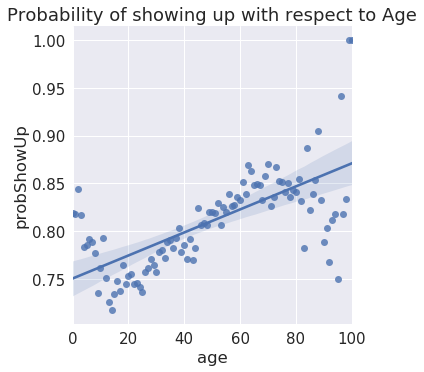

In [81]:
# Dot plot of probability with respect of age
sns.lmplot(data = prob_show(df, 'age'), x = 'age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')

><strong>Visual distribution for probability of showing up with respect to age.</strong>
><p>
>No-show rate of medical appointments is highly dependent on the age of the appointee,ages from 14 to 24 years have higher >cancellations rate. The no-show rate then decreases after around 80 year old appointees.</p>

### Research Question 4:  Do no-shows have a larger timeframe between schedule date and appointment date?

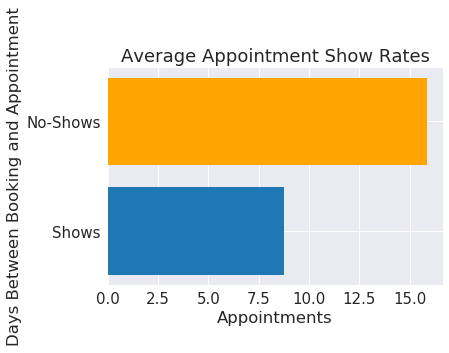

In [82]:
# Create a horizontal bar chart to compare The plot
locations = [1, 2]
heights = [timeframe_shows, timeframe_nos]
labels = ['Shows', 'No-Shows']

plt.barh(locations, heights, tick_label=labels, color=['#1f77b4','orange'])
plt.title('Average Appointment Show Rates')
plt.xlabel('Appointments')
plt.ylabel('Days Between Booking and Appointment');

><strong>Visual distribution of mean timeframe between scheduling and appointment time.</strong>

### Research Question 5:  Do some days of the week have more no-shows than others?

In [83]:
# Days of the week data to plot
nos_mon = no_shows.query('appointment_dow == "Monday"')
nos_mon = nos_mon['appointment_dow'].count()

nos_tue = no_shows.query('appointment_dow == "Tuesday"')
nos_tue = nos_tue['appointment_dow'].count()

nos_wed = no_shows.query('appointment_dow == "Wednesday"')
nos_wed = nos_wed['appointment_dow'].count()

nos_thu = no_shows.query('appointment_dow == "Thursday"')
nos_thu = nos_thu['appointment_dow'].count()

nos_fri = no_shows.query('appointment_dow == "Friday"')
nos_fri = nos_fri['appointment_dow'].count()

nos_sat = no_shows.query('appointment_dow == "Saturday"')
nos_sat = nos_sat['appointment_dow'].count()

nos_sun = no_shows.query('appointment_dow == "Sunday"')
nos_sun = nos_sun['appointment_dow'].count()

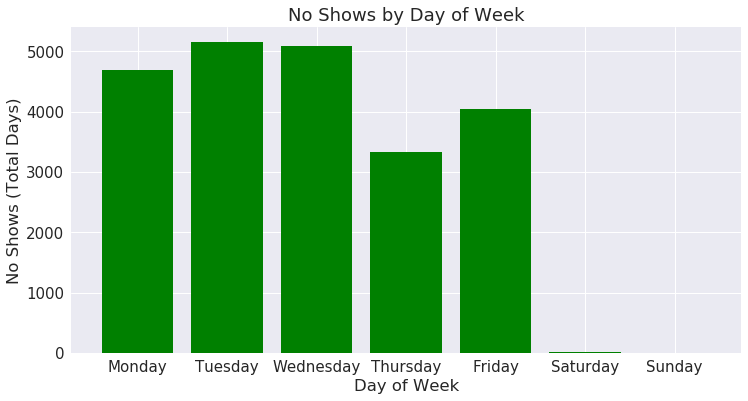

In [84]:
# Create a bar chart to show kept appointments by day of the week
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='green')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(12,6);

><strong>Visual distribution of no-shows by day of week.</strong>

### Research Question 6:  Do SMS notifications coincide with fewer no-shows?

sms_received
0    0.832996
1    0.724247
Name: showed, dtype: float64


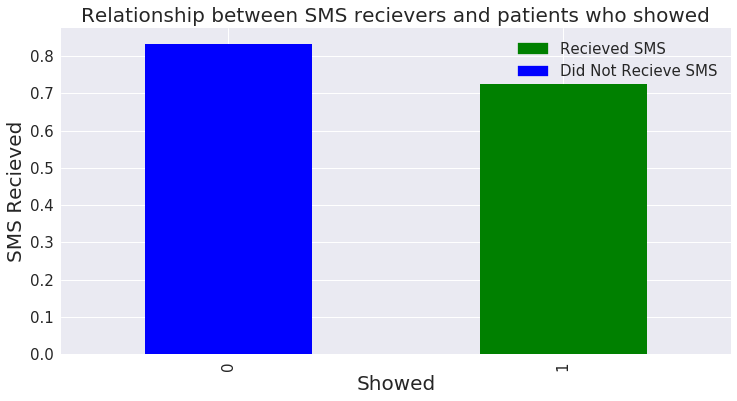

In [85]:
# Using group by function to find relations between features
# and then see the relation between sms recievers and people who showed up and who didn't
print(df.groupby('sms_received')['showed'].mean())

df.groupby('sms_received')['showed'].mean().plot(kind='bar',figsize=(12,6), color=['blue', 'green']);
plt.xlabel("Showed", fontsize = 20)
plt.ylabel("SMS Recieved", fontsize = 20)
plt.title("Relationship between SMS recievers and patients who showed", fontsize = 20)

# legend
green_patch = mpatches.Patch(color='green', label='Recieved SMS')
blue_patch = mpatches.Patch(color='blue', label='Did Not Recieve SMS')

plt.legend(handles=[green_patch, blue_patch])

><strong>Visual comparison between patients that recieved SMS reminder and those that did not that showed.</strong>

sms_received
0    0.167004
1    0.275753
Name: not_showed, dtype: float64


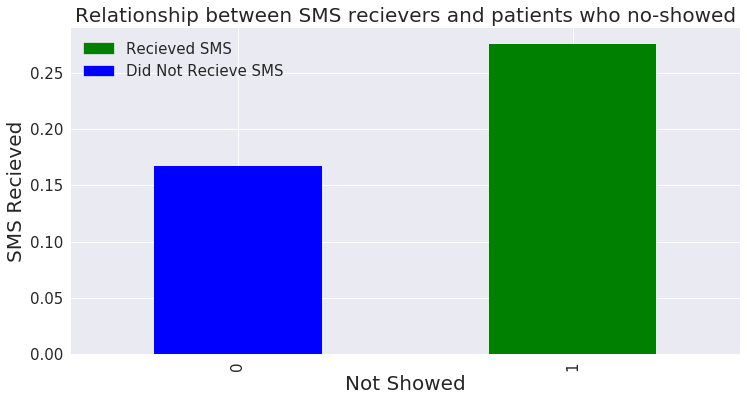

In [86]:
# Using group by function to find relations between features
# and then see the relation between sms recievers and people who showed up and who didn't
print(df.groupby('sms_received')['not_showed'].mean())

df.groupby('sms_received')['not_showed'].mean().plot(kind='bar',figsize=(12,6), color=['blue', 'green']);
plt.xlabel("Not Showed", fontsize = 20)
plt.ylabel("SMS Recieved", fontsize = 20)
plt.title("Relationship between SMS recievers and patients who no-showed", fontsize = 20)

# legend
green_patch = mpatches.Patch(color='green', label='Recieved SMS')
blue_patch = mpatches.Patch(color='blue', label='Did Not Recieve SMS')

plt.legend(handles=[green_patch, blue_patch])

><strong>Visual comparison between patients that recieved SMS reminder and those that did not that no-showed.</strong>
><p>Suprisingly, the percentage of no shows is much higher when SMS messages were received.</p>

### Research Question 7:  Which neighborhoods have more no-shows than others?

In [87]:
# Show top 10 neighboods for pts who showed
shows_by_hood = shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,neighborhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


><strong>Top 10 neighborhoods by shows.</strong>

In [88]:
# Show top 10 neighboods for pts who no-showed
nos_by_hood = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
nos_by_hood.head(10)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


><strong>Top 10 neighborhoods by no-shows.</strong>

<a id='conclusions'></a>
## Conclusions

Approximately 80% of all patients kept their appointment while 20% of all appointments investigated were no-shows. The following conclusions were drawn to serve as a basis for a more robust analysis in the future.

A trend related to age could be observed where people with and age less than 35 tend to miss their appointment more than the people with age greater than 35.

Surprisingly sending SMS had a worse impact on whether the patient kept their appointment as the general trend shows that people who get sms were less likely to attend their appointment as compared to those who did not.

<strong>Limitations:</strong>
<p>
<ul>
<li>The data set explored in this analysis was over a 6 month period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.</li>

<li>Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.</li>

</ul>
</p>


<strong>Questions Answered:</strong>
<p>

<i>What is the overall appointment show-up vs. no-show rate?</i>
<ul>
<li>Approximately 80% of all patients kept their appointment while 20% of all appointments investigated were no-shows.</li>
</ul>

<i>Does financial aid correlate with patient no-shows?</i>
<ul>
<li>Patients with scholarships (financial aid) appeared to have a higher percentage of not attending appointments. This was unexpected and more data would be needed to find the cause of this. </li>
</ul>

<i>Is age indicative of whether a patient will make their appointments?</i>
<ul>
<li>Patient age was charted to see if there was a large difference between the no-shows and shows segments. The mean age of the no-shows segment was 34 compared to the shows segment which was 38. No significant differences to note.</li>
</ul>

<i>Do no-shows have a larger timeframe between schedule date and appointment date?</i>
<ul>
<li>Timeframe between schedule date and apppointment date was investigated to see if there was any correlation with kept appointments. The mean timeframe between schedule date and appointment date for no-shows was significantly higher than shows. The show rate was better if the appointment was booked fewer days from the schedule date. There is a correlation between the number of days out and appointment no-show rate.</li>
</ul>

<i>Do some days of the week have more no-shows than others?</i>
<ul>
<li>Appointment no-shows occurred the most on Tuesdays and the least on Thursdays. Overall, appointments early in the week have a higher no-show rate. </li>
</ul>

<i>Do SMS notifications coincide with fewer no-shows?</i>
<ul>
<li>Surprisingly sending SMS to patients had a worse impact on whether they kept their appointment as the general trend shows that patients who get SMS are less likely to attend their appointment as compared to those who did not.  As can be seen sending an SMS for the appiontment is not neccessary the right option to make to ensure that the patient will show-up.</li>
</ul>

<i>Which neighborhoods have more no-shows than others?</i>
<ul>
<li>Neighborhoods in which the appointment took place were charted to see if certain areas had higher no-show rates. JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows segments.</li>
</ul>

</p>



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0